# Loading Libraries and Dataset

In [ ]:

!pip install -i https://test.pypi.org/simple/ whatsapp-chat-analyser==1.0.1



Looking in indexes: https://test.pypi.org/simple/


In [ ]:
#importing required libraries
from WhatsappChatAnalyser import author
from WhatsappChatAnalyser import group
from WhatsappChatAnalyser import whatsapp_text_cleaner as wtc
from WhatsappChatAnalyser import whatsapp_chat_visualizer as wcv
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Defining author and group class
A = author.Author()
G = group.Group()

>**Function:** wtc.load_clean_dataframe

This function cleans the text file and returns a structured dataframe for analysis.

In [ ]:
# Loading the text file for analysis.
df = wtc.load_clean_dataframe('/content/WhatsApp Chat with Demo.txt')
df.head()

,Date,Time,Author,Message,Hours
0,2022-03-08,12:22 am,None,"Ananya Sharma UW Admits created group ""Demo""",0
1,2022-03-08,12:27 am,None,Ananya Sharma UW Admits added you,0
2,2022-03-08,12:27 am,Aishwarya Msds,Niharika rocks 👩‍🎤🪨,0
3,2022-03-08,12:27 am,Niharika Karnik Udub,East or west niharika is the best,0
4,2022-03-08,12:27 am,Ananya Sharma UW Admits,Anushka is working on the test codes,0


### Updating info


In [ ]:
# populating class attributes
A.update_info(df)
G.update_info(df)

# Performing Data Analysis for Authors

>**Function:** A.get_stats(df)

This function will generate the overall statistics for each author in the chat. You can get the number of messages, number of media shared, number of days texted and a lot more.

In [ ]:
A.get_stats(df)[0:10]

,Author,Days_texted,Start_date,Last_date,Letter_count,Word_count,Media_shared,Messages_texted,Messages_Deleted,daysInGroup
0,Aishwarya Msds,1,2022-03-08,2022-03-08,608,126,2.0,36,0.0,1
1,Niharika Karnik Udub,1,2022-03-08,2022-03-08,520,100,11.0,27,0.0,1
2,Ananya Sharma UW Admits,1,2022-03-08,2022-03-08,105,19,0.0,4,0.0,1
3,Khirod Sahoo,1,2022-03-08,2022-03-08,704,130,3.0,34,1.0,1
4,Aishwarya Msds:,1,2022-03-08,2022-03-08,0,1,0.0,1,0.0,1


>**Function:** A.get_aggressiveness(df)

To check how active individual authors are on a daily basis, use the get_aggressiveness funciton. This function returns the average number of messages per author per day.

In [ ]:
A_agg=A.get_aggressiveness(df)
A_agg[:7]

Average number of messages per day for active days


,Author,Aggressiveness
0,Aishwarya Msds,36.0
3,Khirod Sahoo,34.0
1,Niharika Karnik Udub,27.0
2,Ananya Sharma UW Admits,4.0
4,Aishwarya Msds:,1.0


>**Function:** A.get_number_mediasShared((df)

We can share images, videos and stickers on WhatsApp, which is counted as media. This function returns the number of media files shared by the author since they joined the group.

In [ ]:
A_media=A.get_number_mediasShared(df)
A_media

,Author,Media_shared
Aishwarya Msds,Aishwarya Msds,2
Khirod Sahoo,Khirod Sahoo,3
Niharika Karnik Udub,Niharika Karnik Udub,11


>**Function:** A.get_letters_words((df)

The length of messages may vary for each author - one can have more messages but of short lenght while another could have less number of messages but huge. This function returns the number of letter count and word count.

In [ ]:
A.get_letters_words(df)[:10]

,Letter_count,Word_count
Author,,
Khirod Sahoo,704,130
Aishwarya Msds,608,126
Niharika Karnik Udub,520,100
Ananya Sharma UW Admits,105,19
Aishwarya Msds:,0,1


> Other functions you can explore under the author class
- A.get_frequency
- A.get_consistency
- A.get_number_deletedMessges
- A.get_metrics 
- A.get_number_activeDays 
- A.get_number_daysInGroup
- A.get_number_textMessages 
- A.get_startDate_endDate 

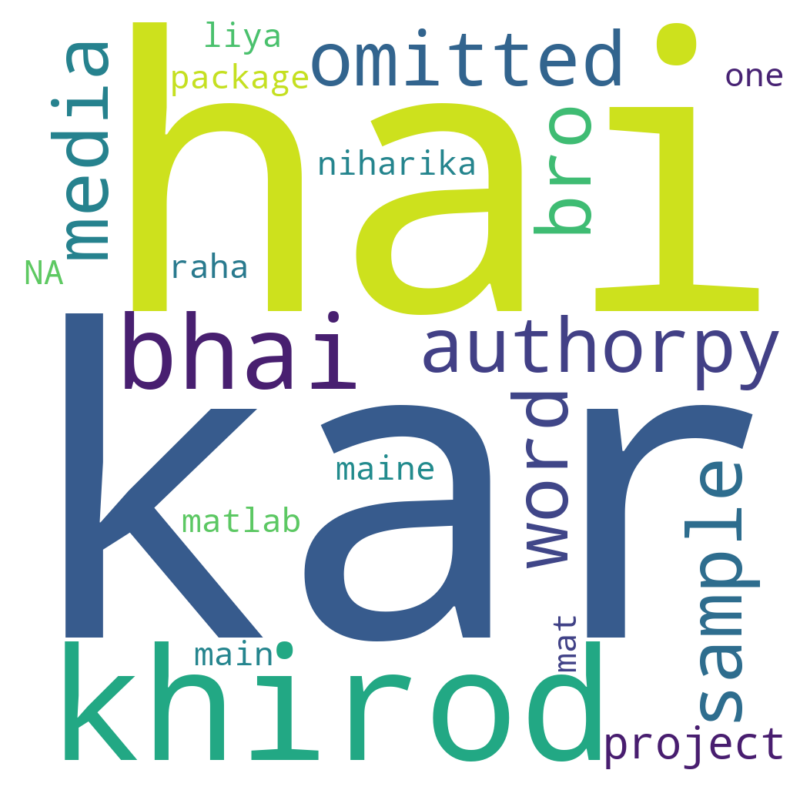

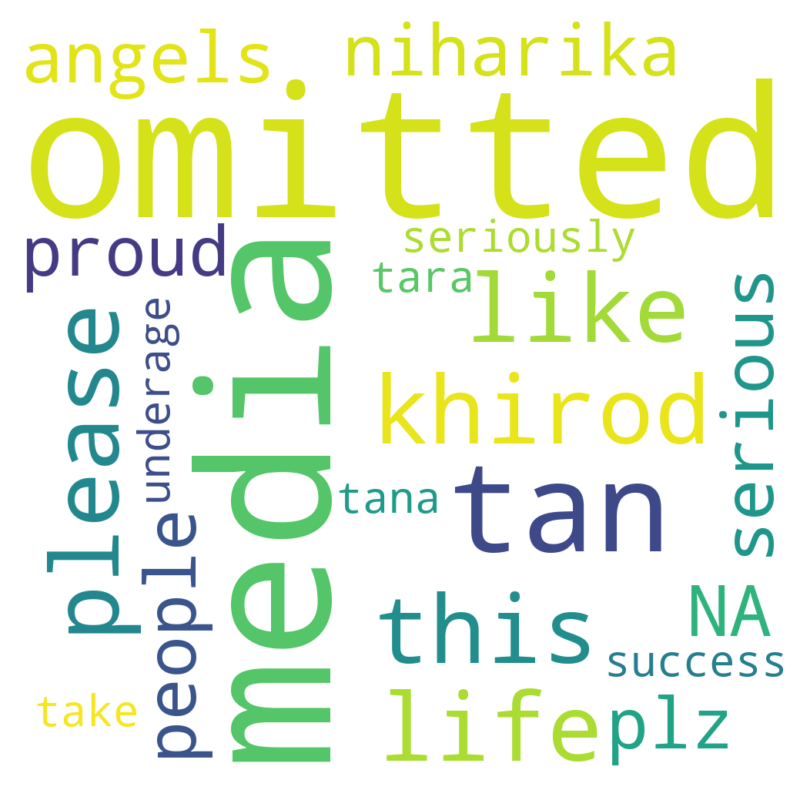

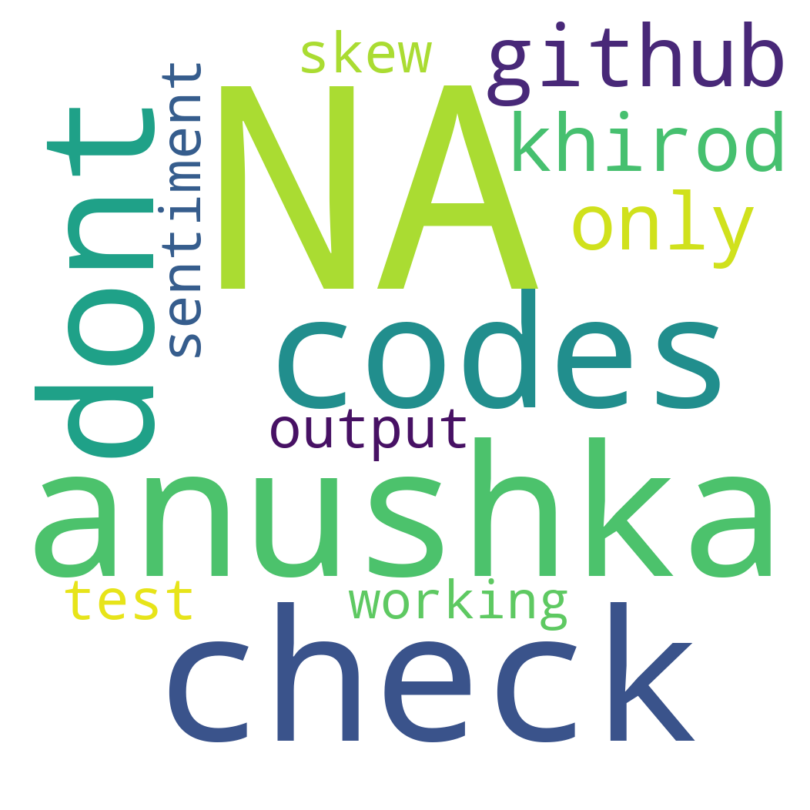

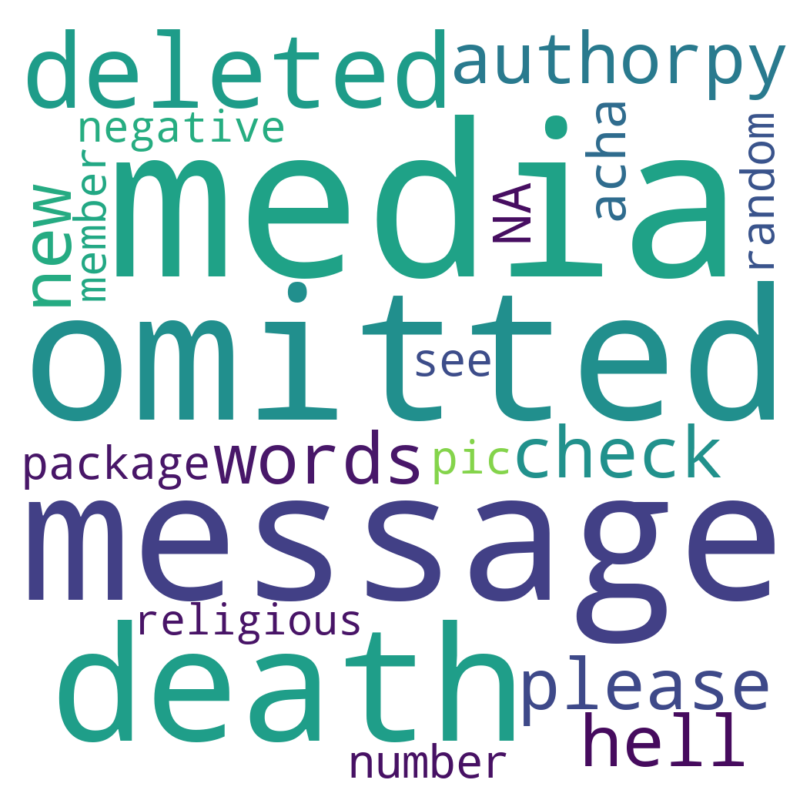

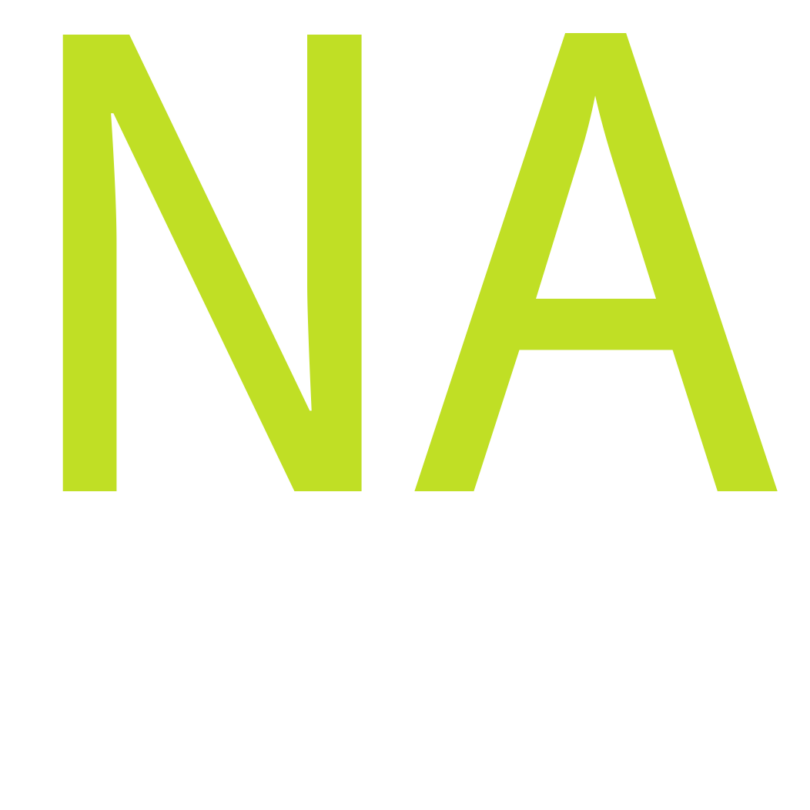

In [ ]:

A_text_info=A.get_text_info(df,wordCloud=True)

In [ ]:
A_text_info

,Author,avgWordspermessage,minWordspermessage,maxWordspermessage,emovocab,totalemojis,top5emojis,vocab,top5words,words,Pos,Neg,Neu
0,Aishwarya Msds,3.472222,1,12,0,0,,72,kar hai khirod bhai authorpy,kar hai khirod bhai authorpy sample omitted br...,0.077667,0.062667,0.859667
1,Niharika Karnik Udub,3.703704,1,9,0,0,,41,omitted media tan like this,omitted media tan like this life khirod please...,0.274000,0.075000,0.651000
2,Ananya Sharma UW Admits,4.750000,3,7,0,0,,12,anushka check codes dont github,anushka check codes dont github khirod only ou...,0.000000,0.000000,1.000000
3,Khirod Sahoo,3.823529,1,14,0,0,,65,media message omitted death deleted,media message omitted death deleted authorpy w...,0.078333,0.104667,0.817000
4,Aishwarya Msds:,0.000000,0,0,0,0,,0,,,NaN,NaN,NaN


# Data Visualization

>**Function:** wcv.bar_plot(df, n)

This function generates the bar plot indicating frequnecy of messages per author. Pass the cleaned dataframe and the number of most active authors you want to visualize. 

DataFrame needs to be of dimension ,2

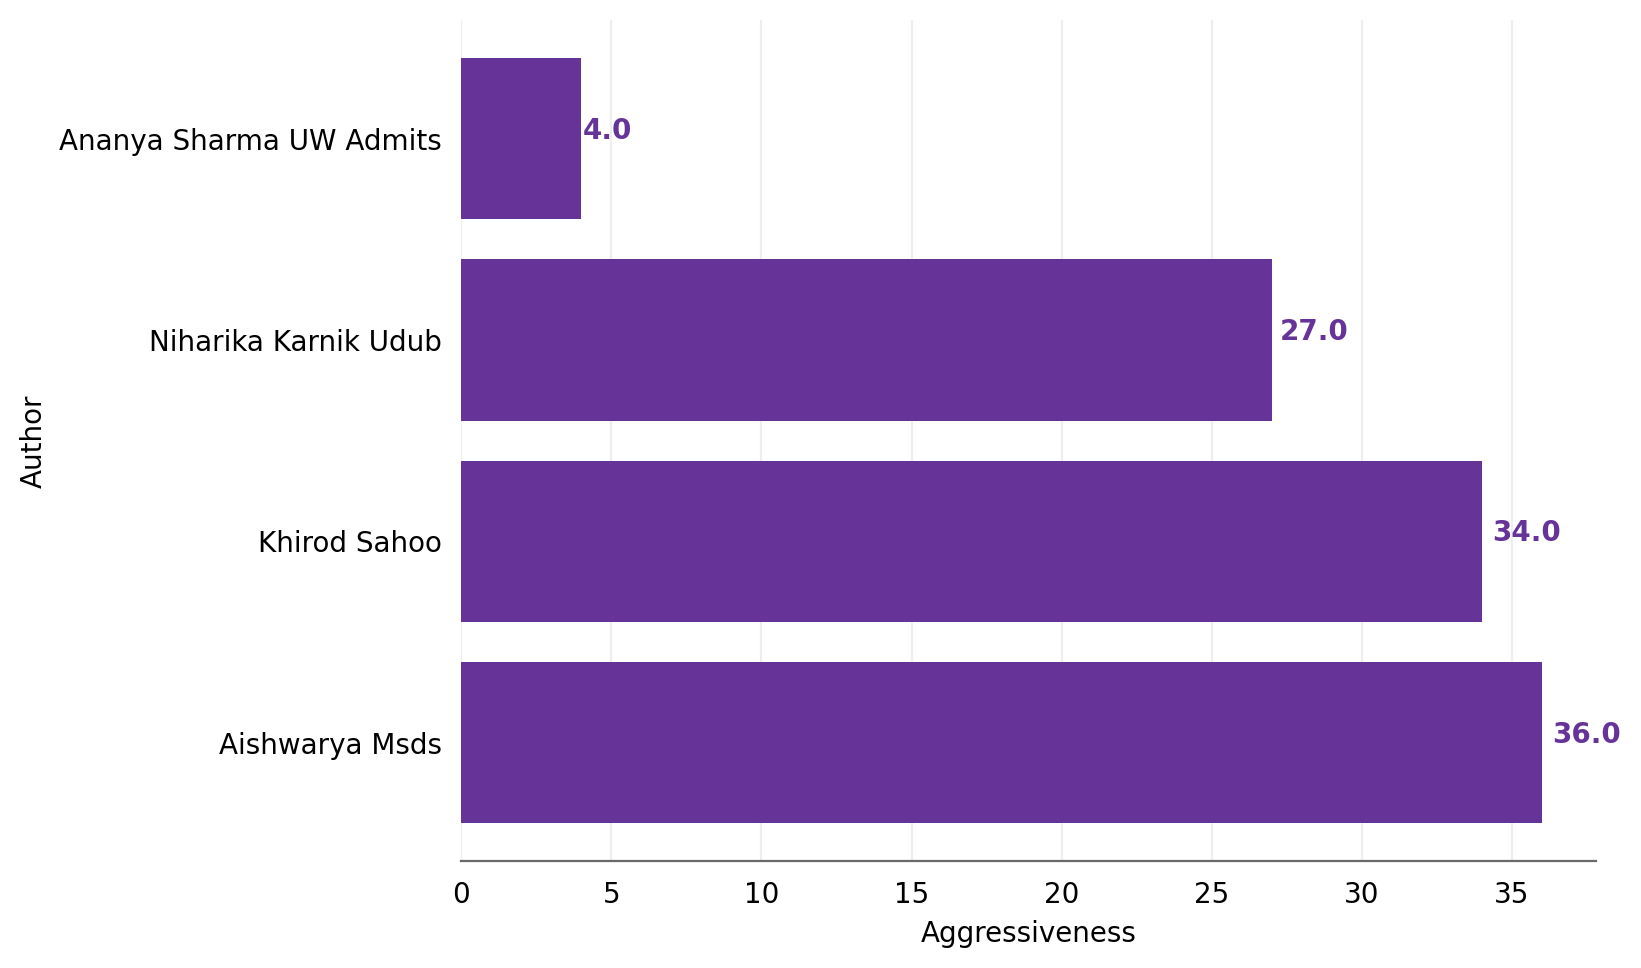

In [ ]:
wcv.bar_plot(A_agg[['Author','Aggressiveness']],max=4,sort=False)

>**Function:** wcv.pie(df, n)

This function generates the pie chart showing the contribution of each author in the chat. Pass the cleaned dataframe and the number of authors you want to visualise.

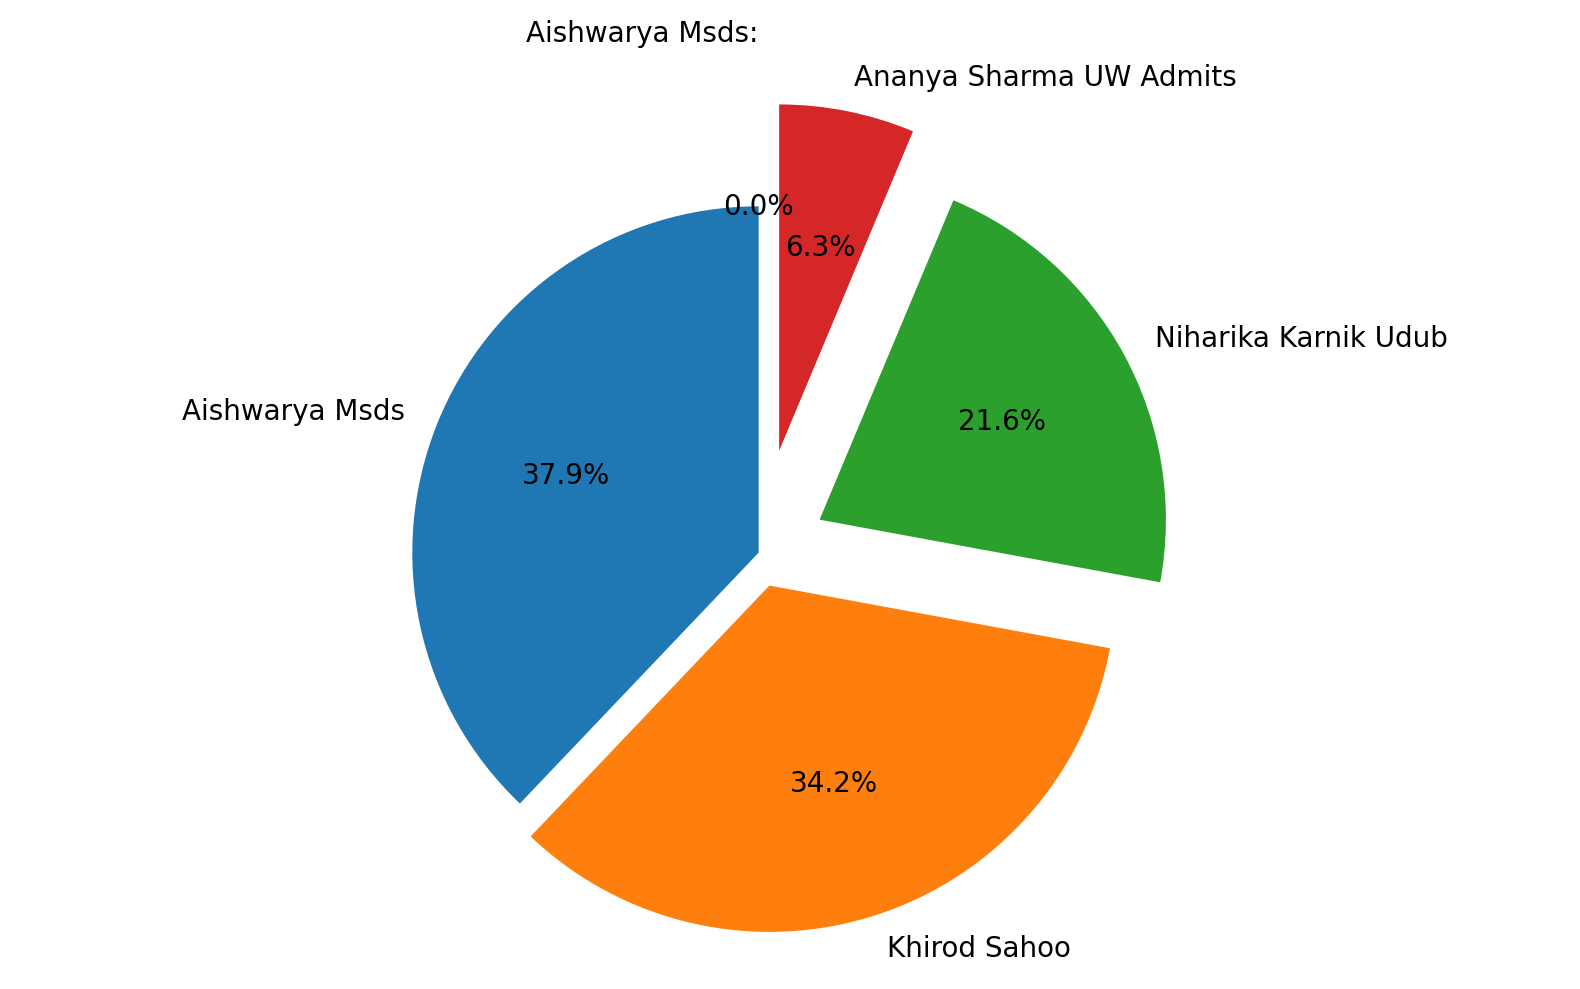

In [ ]:
wcv.pie(A_text_info[['Author','vocab']]) 

# Performing Data Analysis for the Group

>**Function:** G.get_stats(df)

This function will generate the overall statistics for each author in the chat. You can get the number of messages, number of media shared, number of days texted and a lot more.

,Days_texted,Start_date,Last_date,Letter_count,Word_count,Media_shared,Messages_texted,Messages_Deleted,daysInGroup
0,1,2022-03-08,2022-03-08,1937,376,16,102,1,1 days


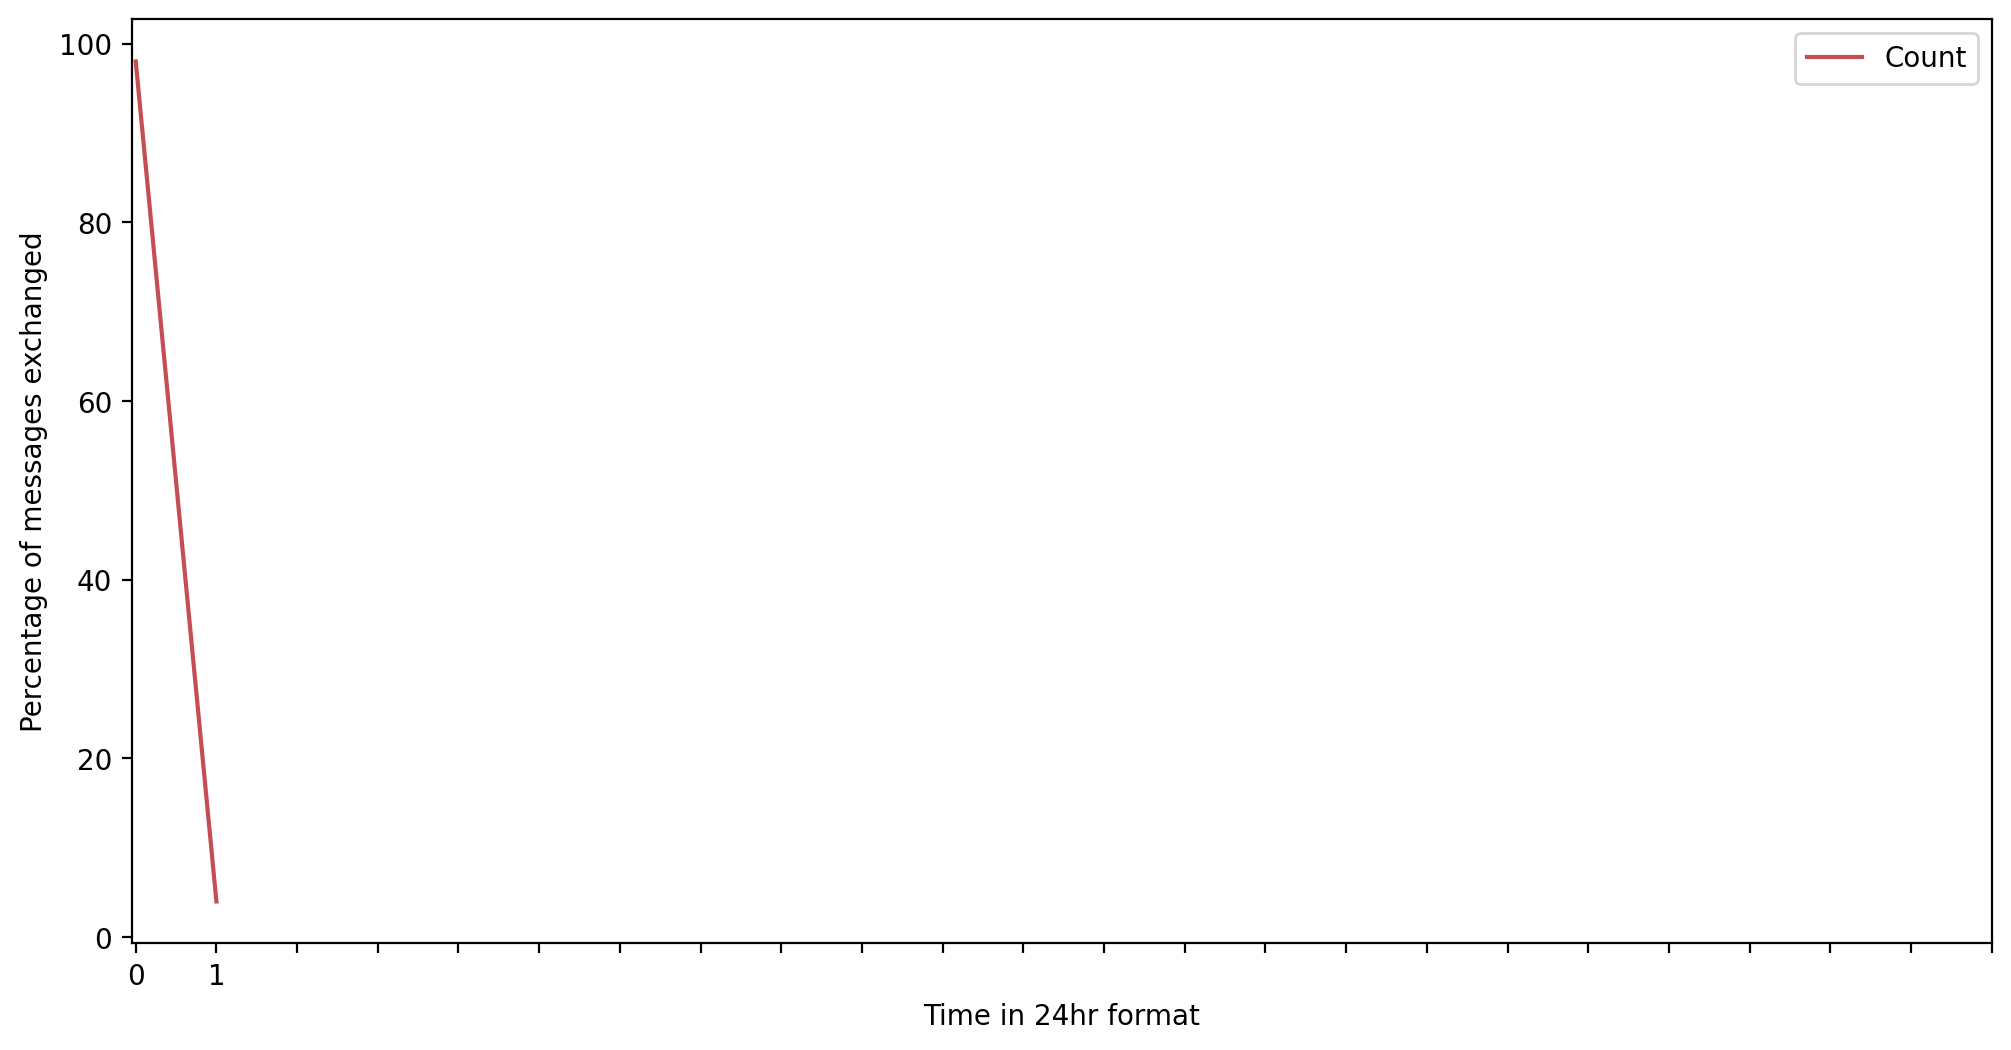

In [ ]:
G.get_stats(df)[0:10]

>**Function:** G.get_aggressiveness(df)

To check how active individual authors are on a daily basis, use the get_aggressiveness funciton. This function returns the average number of messages per author per day.

Average number of messages per day for active days


0    102.0
dtype: float64

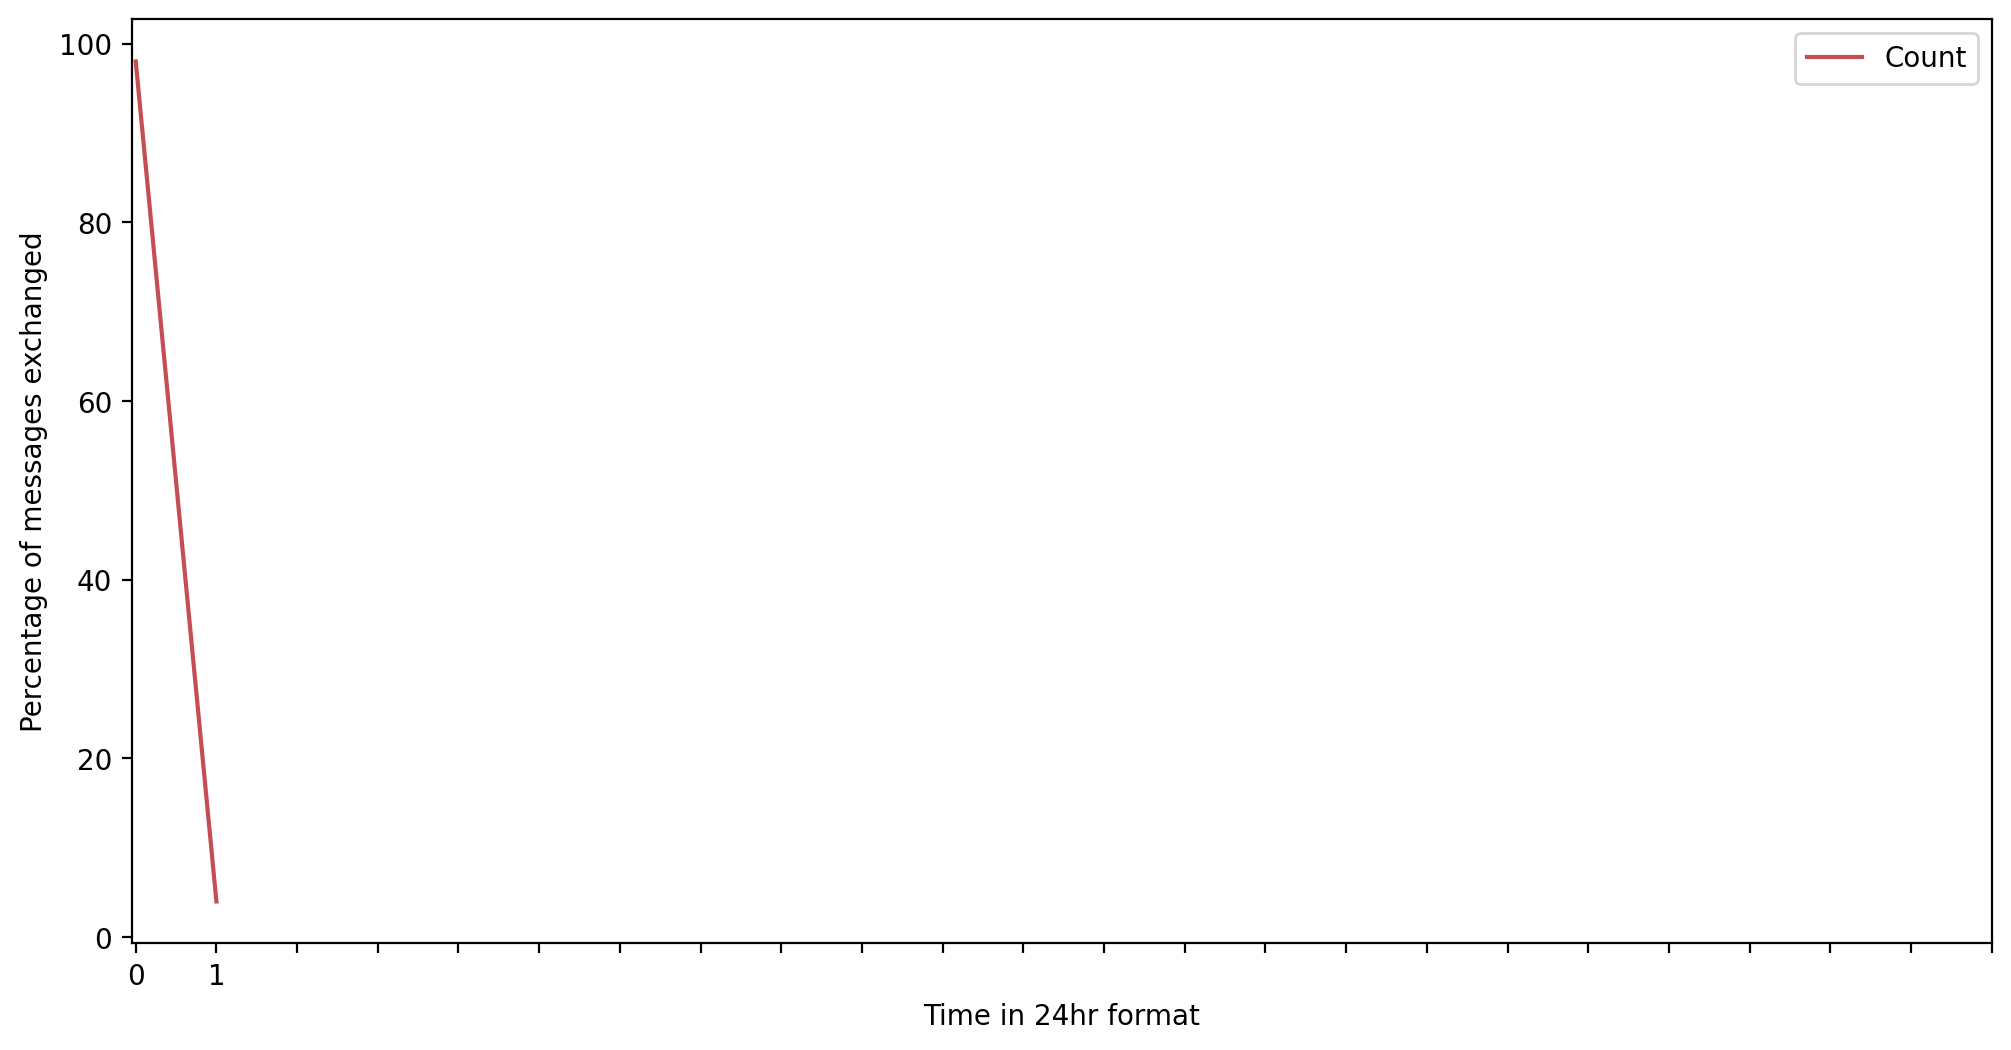

In [ ]:
G_agg=G.get_aggressiveness(df)
G_agg[:7]

>**Function:** G.get_number_mediasShared((df)

We can share images, videos and stickers on WhatsApp, which is counted as media. This function returns the number of media files shared by the author since they joined the group.

In [ ]:
G_media=G.get_number_mediasShared(df)
G_media

16

>**Function:** G.get_letters_words((df)

Returns [letters,Words]

The length of messages may vary for each author - one can have more messages but of short lenght while another could have less number of messages but huge. This function returns the number of letter count and word count.

In [ ]:
G.get_letters_words(df)[:10]

[1937, 376]

> Other functions you can explore under the author class
- A.get_frequency
- A.get_consistency
- A.get_number_deletedMessges
- A.get_metrics 
- A.get_number_activeDays 
- A.get_number_daysInGroup
- A.get_number_textMessages 
- A.get_startDate_endDate 

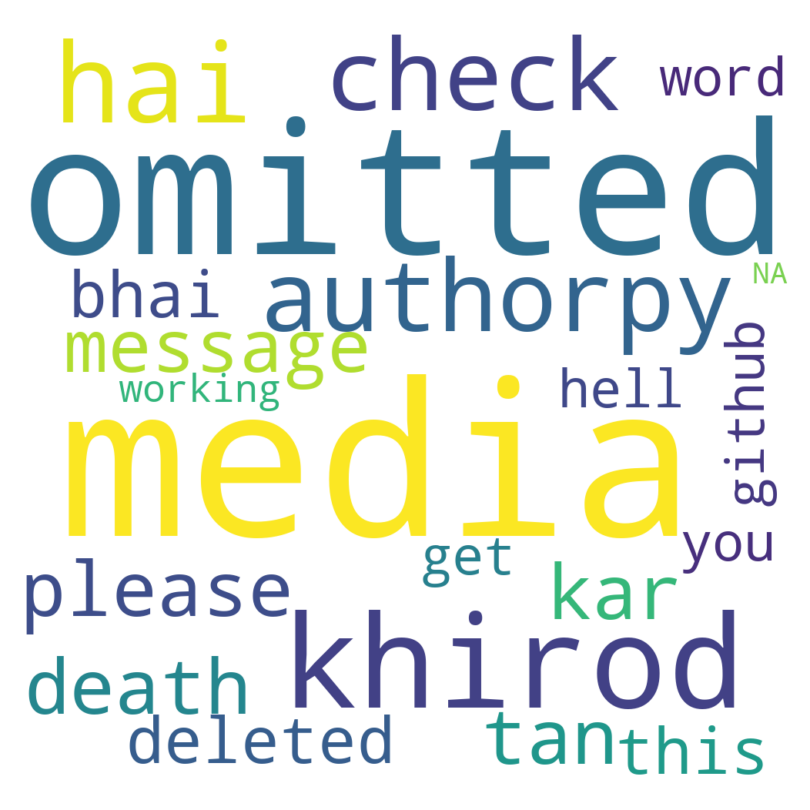

In [ ]:
# wcv.WordCloud(df)
G_text_info=G.get_text_info(wordCloud=True)

In [ ]:
G_text_info

,Author,avgWordspermessage,minWordspermessage,maxWordspermessage,emovocab,totalemojis,top5emojis,vocab,top5words,words,Pos,Neg,Neu
0,Group,374,374,374,0,0,,163,media omitted khirod hai check,media omitted khirod hai check authorpy please...,0.213,0.0562,0.7308
